In [1]:
from core.structs import Tensor
import numpy as np
from utils.graph_visualizer import draw_dot

In [2]:
a = Tensor(np.array([[1,2,3], [4,5,6]]), requires_grad=True)
b = Tensor(5, requires_grad=True)
d = Tensor(np.array([5,5,5]), requires_grad=True)
c = (a + b + a) * d

In [4]:
e = c.relu()

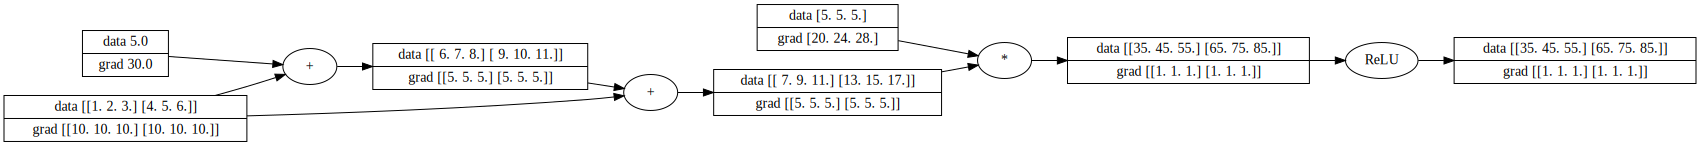

In [7]:
draw_dot(e)

In [6]:
e.backward()

In [ ]:
from core.structs import Tensor
import numpy as np

# Initialize parameters with gradient tracking
x = Tensor([[1.0, 2.0]], requires_grad=True)
w = Tensor([[3.0], [4.0]], requires_grad=True)

# Forward pass
y = x @ w

# Backward pass - the engine builds the graph and calculates gradients
y.backward()

print(f"Result: {y.data}")
print(f"W Gradient: {w.grad}")


ModuleNotFoundError: No module named 'lightgrad'